In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
directory = "dataset/"
feature_tables = ['train.csv', 'test.csv']

df_train = directory + feature_tables[0]
df_test = directory + feature_tables[1]

# Create dataframes
print(f'Reading csv from {df_train}...')
df = pd.read_csv(df_train)
print('...Complete')

print(f'Reading csv from {df_train}...')
df2 = pd.read_csv(df_test)
print('...Complete')

Reading csv from dataset/train.csv...
...Complete
Reading csv from dataset/train.csv...
...Complete


In [6]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [11]:
df.describe().transpose()

count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment             103904.0      3.358158      1.332991   0.0   
On-board service                   103904.0      3.382363      1.288354   0.0   
Leg room service                   103904.0      3.351055      1.315605   0.0   
Baggage handling                   103904.0      3.631833      1.180903   1.0   
Checkin service                    103904.0      3.304290      1.265396   0.0   
Inflight service                   103904.0      3.640428      1.175663   0.0   
Cleanliness                        103904.0      3.286351      1.312273   0.0   
Departure Delay in Minutes         103904.0     14.815618     38.230901   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25975.75  51951.5  77927.25  103903.0  
id                                 32533.75  64856.5  97368.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    843.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

## Exploratory Data Analysis¶
heatmap of correlation

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

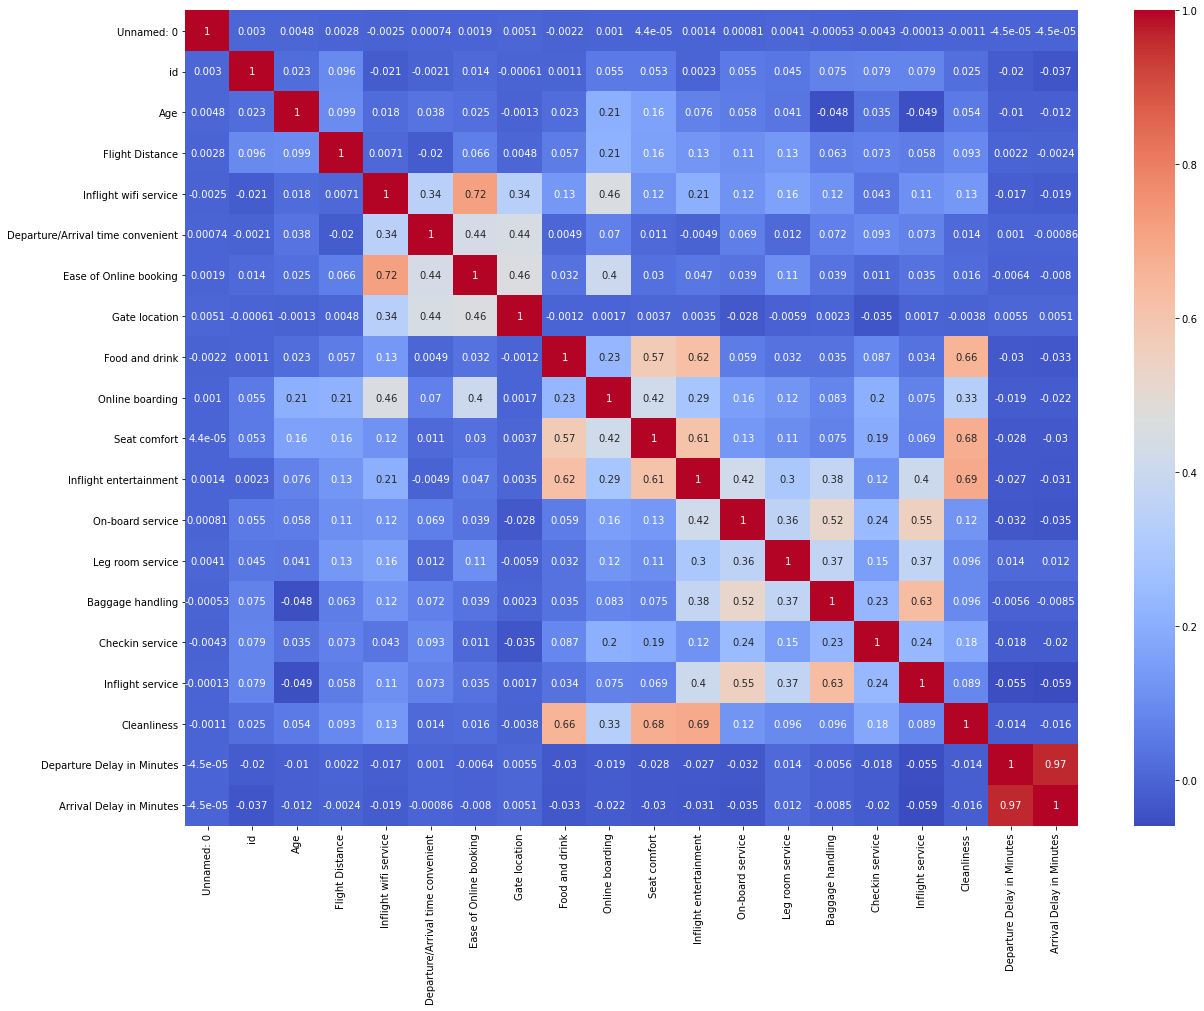

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

In [13]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

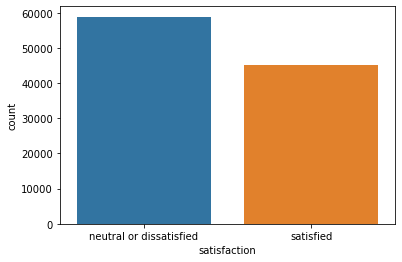

In [14]:
sns.countplot(x='satisfaction',data=df)

In [15]:
def satisfac(string):
    if string == 'satisfied': return 1
    else: return 0

df['satisfactionN'] =df['satisfaction'].apply(satisfac) 

In [16]:
df.head(5)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 4                 3   
1                                  2  ...                 1                 5   
2                                  2  ...                 4                 3   
3                                  5  ...                 2                 5   
4                                  3  ...                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  satisfactionN  
0  neutral or dissatisfied              0  
1  neutral or dissatisfied              0  
2                satisfied              1  
3  neutral or dissatisfied              0  
4                satisfied              1  

[5 rows x 26 columns]

In [17]:
df.drop('satisfaction',inplace=True,axis=1)

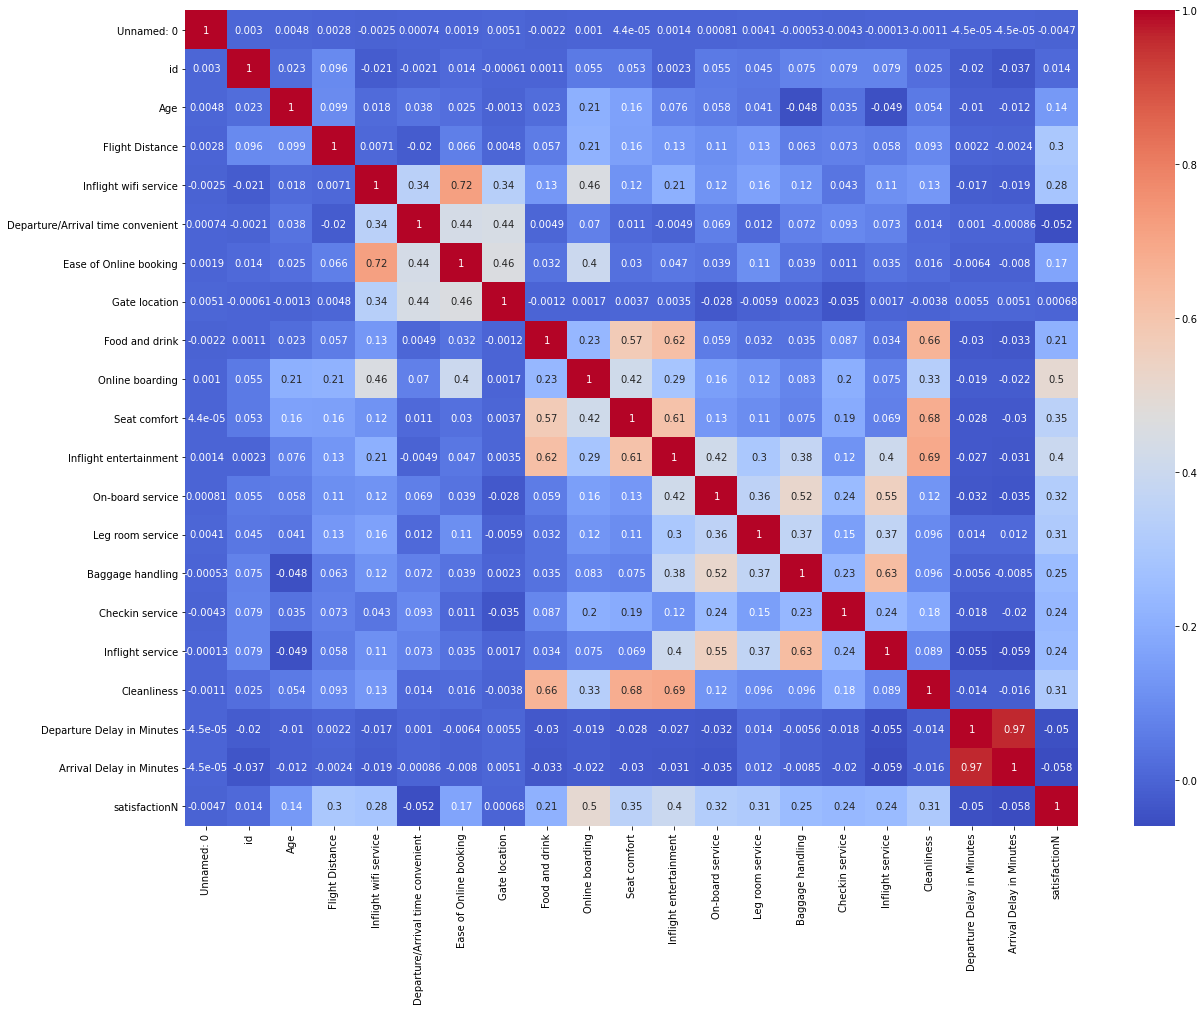

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

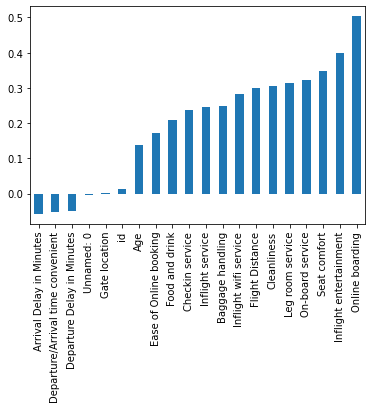

In [19]:
df.corr()['satisfactionN'].sort_values().drop('satisfactionN').plot(kind='bar')

In [20]:
df['Online boarding'].value_counts()

4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

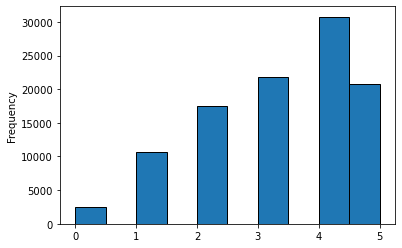

In [21]:
df['Online boarding'].plot(kind='hist',ec='black')

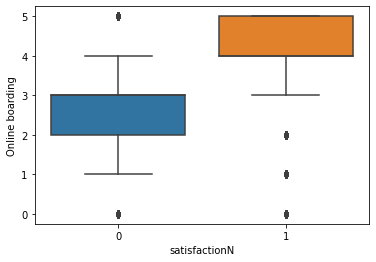

In [22]:
sns.boxplot(x='satisfactionN',y = 'Online boarding',data=df)

The more satisfied the person is with online boarding then there are greater chances that the person will be satisfied. Same is the case for all the other parameters

In [23]:
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfactionN  
0                      18.0              0  
1                       6.0              0  
2                       0.0              1  
3                       9.0              0  
4                       0.0              1  

[5 rows x 25 columns]

In [24]:
GenderN = pd.get_dummies(df['Gender'],drop_first=True)
CustomerN = pd.get_dummies(df['Customer Type'],drop_first=True)
TypeN = pd.get_dummies(df['Type of Travel'],drop_first=True)
ClassN = pd.get_dummies(df['Class'],drop_first=True)
df = pd.concat([df,GenderN,CustomerN,TypeN,ClassN],axis =1)
df.drop(['Gender','Customer Type','Type of Travel','Class'],inplace =True,axis = 1)

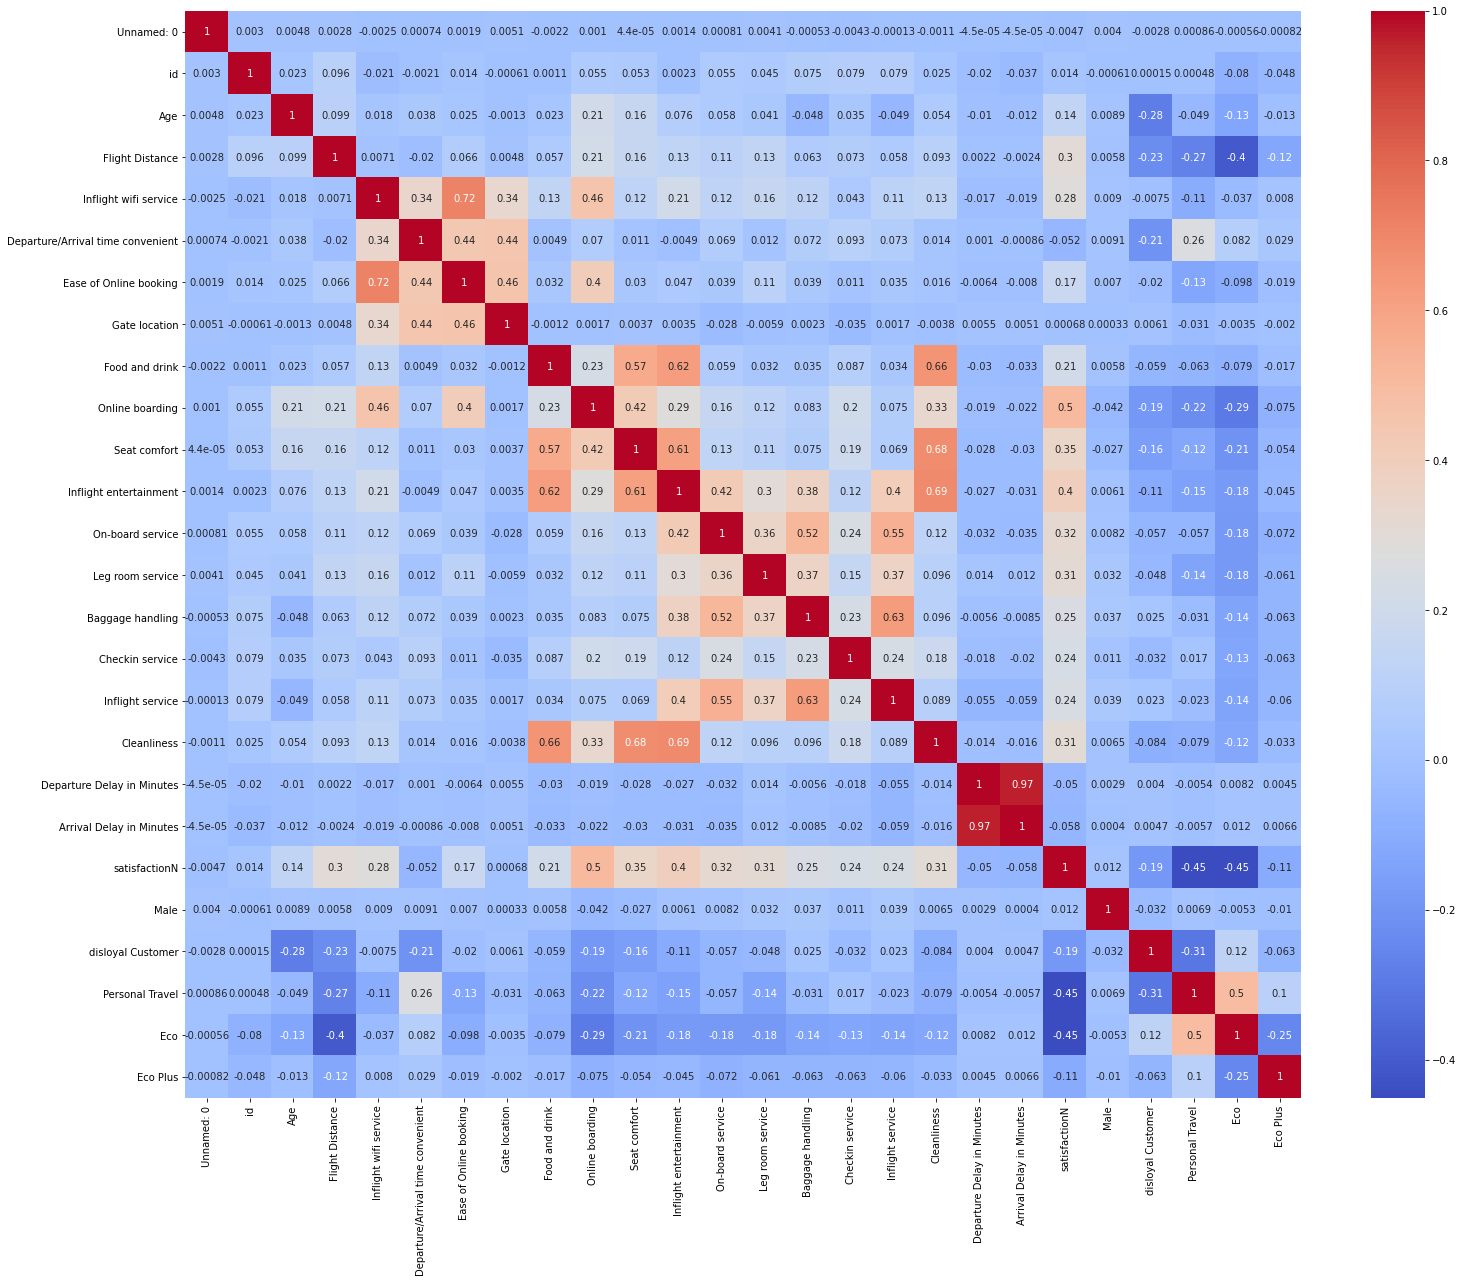

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

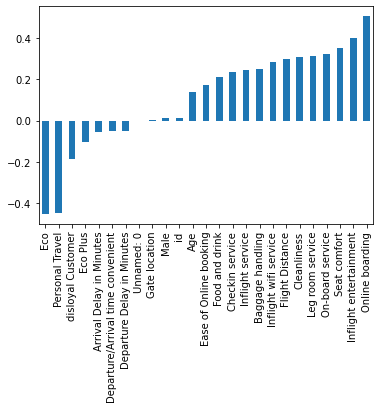

In [26]:
df.corr()['satisfactionN'].sort_values().drop('satisfactionN').plot(kind='bar')

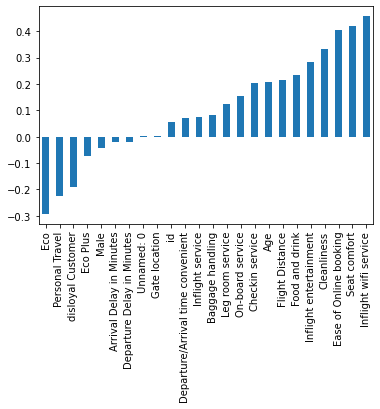

In [27]:
df.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfactionN']).plot(kind='bar')

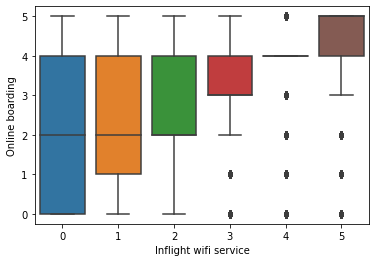

In [28]:
sns.boxplot(x='Inflight wifi service',y = 'Online boarding',data=df)

In [30]:
df['Flight Distance'].iplot(kind='hist',bins=50)

In [31]:
df['Age'].iplot(kind='hist',bins=50)

In [32]:
import plotly.express as px
fig = px.box(df, x="satisfactionN", y="Age", color="Eco")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

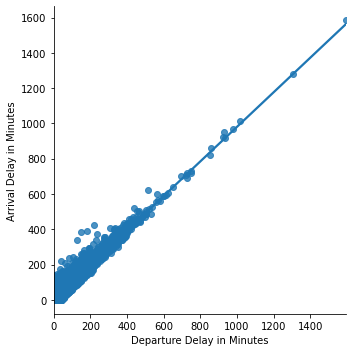

In [33]:
sns.lmplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df)

In [34]:
df.drop('Arrival Delay in Minutes',axis=1,inplace=True)

## Preprocessing

In [35]:
df.isnull().sum()/len(df)
# Only 0.002% data is missing, so we can drop the rows 
# Data was missing in only "Arrival delay in Minutes" column , so these steps are not necessary

Unnamed: 0                           0.0
id                                   0.0
Age                                  0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
satisfactionN                        0.0
Male                                 0.0
disloyal Customer                    0.0
Personal Travel                      0.0
Eco                                  0.0
Eco Plus        

In [37]:
df.dropna(axis=0,inplace=True)

In [38]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

## Applying Different models
Based on the performance,these three models suits our dataset quite efficiently
1. Random Forest Classifier
2. XgBoost
3. Naive Bayes(for general classification)

In [39]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/liangyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/LiangYu/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
X_train = df.drop('satisfactionN',axis=1)
y_train = df['satisfactionN']

In [40]:
df2['satisfactionN'] =df2['satisfaction'].apply(satisfac)
GenderN = pd.get_dummies(df2['Gender'],drop_first=True)
CustomerN = pd.get_dummies(df2['Customer Type'],drop_first=True)
TypeN = pd.get_dummies(df2['Type of Travel'],drop_first=True)
ClassN = pd.get_dummies(df2['Class'],drop_first=True)
df2 = pd.concat([df2,GenderN,CustomerN,TypeN,ClassN],axis =1)
df2.drop(['Gender','Customer Type','Type of Travel','Class'],inplace =True,axis = 1)
df2.drop('Arrival Delay in Minutes',axis=1,inplace=True)
df2.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [41]:
df2.drop('satisfaction',axis=1,inplace=True)
X_test = df2.drop('satisfactionN',axis=1)
y_test= df2['satisfactionN']

In [ ]:
print("X_train {}\nX_test {}\ny_train {}\ny_test {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

### Random forest

In [ ]:
classifier1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,n_jobs=-1)
classifier1.fit(X_train,y_train)

In [42]:
y_pred = classifier1.predict(X_test)

NameError: name 'classifier1' is not defined

In [43]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_random_forest = accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

### XGBoost

In [44]:
classifier2 = XGBClassifier(n_estimators = 500,n_jobs=-1)
classifier2.fit(X_train,y_train)

NameError: name 'XGBClassifier' is not defined

In [45]:
#Predicting on test set results
y_pred = classifier2.predict(X_test)

NameError: name 'classifier2' is not defined

In [46]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_xgboost = accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

### naive_bayes

In [47]:
classifier3 = GaussianNB()
classifier3.fit(X_train,y_train)

NameError: name 'GaussianNB' is not defined

In [48]:
#Predicting on test set results
y_pred = classifier3.predict(X_test)

NameError: name 'classifier3' is not defined

In [49]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
acc_naive_bayes = accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [50]:
### Result

In [51]:
print('Accuracy:-\n')
print("Random Forest {}\nXGBoost {}\nNaive Bayes {}\n".format(acc_random_forest,acc_xgboost,acc_naive_bayes))

Accuracy:-



NameError: name 'acc_random_forest' is not defined